### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
# Keras and Tensorflow >2.0
# Tiingo api for data

In [ ]:
### Data Collection
import pandas_datareader as pdr

In [ ]:
#Importing data of TATA Motors (TTM)
df = pdr.get_data_tiingo('TTM', api_key=' ')

In [ ]:
df.to_csv('TTM.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('TTM.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TTM,2016-03-28 00:00:00+00:00,27.31,27.3800,27.010,27.31,712982,27.300954,27.370930,27.001053,27.300954,712982,0.0,1.0
1,TTM,2016-03-29 00:00:00+00:00,28.67,28.8000,27.670,27.73,1999612,28.660503,28.790460,27.660834,27.720814,1999612,0.0,1.0
2,TTM,2016-03-30 00:00:00+00:00,29.03,29.4589,28.795,29.21,1715476,29.020384,29.449142,28.785462,29.200324,1715476,0.0,1.0
3,TTM,2016-03-31 00:00:00+00:00,29.05,29.1900,28.900,28.94,881586,29.040377,29.180331,28.890427,28.930414,881586,0.0,1.0
4,TTM,2016-04-01 00:00:00+00:00,28.72,28.7600,28.100,28.30,912464,28.710487,28.750473,28.090692,28.290626,912464,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,TTM,2021-03-17 00:00:00+00:00,21.33,21.36,20.23,20.87,1700706,21.33,21.36,20.23,20.87,1700706,0.0,1.0
1253,TTM,2021-03-18 00:00:00+00:00,20.71,21.10,20.62,21.03,1081152,20.71,21.10,20.62,21.03,1081152,0.0,1.0
1254,TTM,2021-03-19 00:00:00+00:00,21.22,21.34,20.79,20.96,1172907,21.22,21.34,20.79,20.96,1172907,0.0,1.0
1255,TTM,2021-03-22 00:00:00+00:00,20.93,21.00,20.57,20.89,994065,20.93,21.00,20.57,20.89,994065,0.0,1.0
1256,TTM,2021-03-23 00:00:00+00:00,20.67,21.10,20.65,20.99,1441686,20.67,21.10,20.65,20.99,1441686,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0       27.31
1       28.67
2       29.03
3       29.05
4       28.72
        ...  
1252    21.33
1253    20.71
1254    21.22
1255    20.93
1256    20.67
Name: close, Length: 1257, dtype: float64

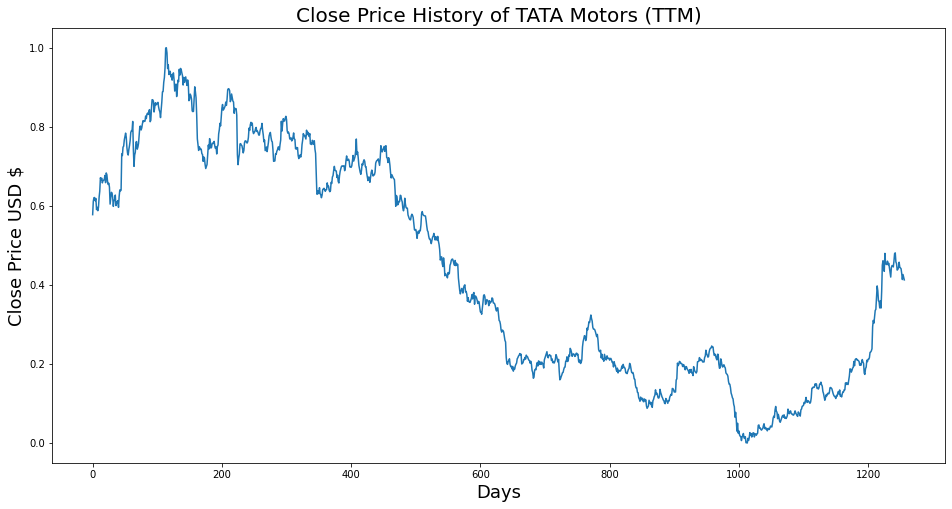

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Close Price History of TATA Motors (TTM)', fontsize=20)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD $',fontsize=18)
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0       27.31
1       28.67
2       29.03
3       29.05
4       28.72
        ...  
1252    21.33
1253    20.71
1254    21.22
1255    20.93
1256    20.67
Name: close, Length: 1257, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.57771699]
 [0.61153942]
 [0.62049241]
 ...
 [0.42626212]
 [0.41904999]
 [0.41258393]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)                  # 65% data as traing data
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
train_data

array([[0.57771699],
       [0.61153942],
       [0.62049241],
       [0.6209898 ],
       [0.61278289],
       [0.61850286],
       [0.5904004 ],
       [0.59636906],
       [0.58766476],
       [0.59636906],
       [0.62173589],
       [0.63715494],
       [0.67097737],
       [0.66550609],
       [0.66998259],
       [0.65804526],
       [0.66426262],
       [0.66451132],
       [0.66674956],
       [0.67694603],
       [0.65854265],
       [0.68316339],
       [0.67868689],
       [0.66227307],
       [0.65406615],
       [0.65705048],
       [0.64710271],
       [0.60432728],
       [0.62024372],
       [0.6341706 ],
       [0.63193236],
       [0.6209898 ],
       [0.59860731],
       [0.61402636],
       [0.61402636],
       [0.62720716],
       [0.60059687],
       [0.60954986],
       [0.60581945],
       [0.61328028],
       [0.59612037],
       [0.62347675],
       [0.64013927],
       [0.63790102],
       [0.63964188],
       [0.7314101 ],
       [0.72718229],
       [0.748

## Data preprocessing

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 299ms/step - loss: 0.1999 - val_loss: 0.0076
Epoch 2/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0189 - val_loss: 0.0190
Epoch 3/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0090 - val_loss: 0.0048
Epoch 4/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 5/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 6/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 7/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 8/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 9/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 10/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0019 - val_lo

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

28.308682130751073

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

11.774067407179606

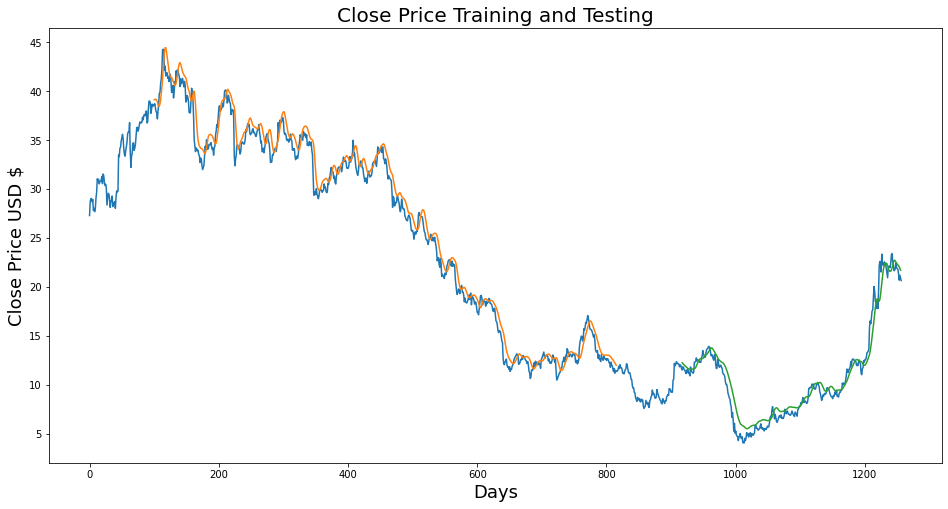

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.title('Close Price Training and Testing', fontsize=20)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD $',fontsize=18)
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.1206167619995026,
 0.1166376523252922,
 0.12434717731907487,
 0.12956975876647597,
 0.12932106441183783,
 0.13479234021387715,
 0.134543645859239,
 0.15220094503854759,
 0.14797314100969905,
 0.1524496393931858,
 0.1489679184282517,
 0.14797314100969905,
 0.15941308132305398,
 0.16960954986321808,
 0.18776423775180306,
 0.18652076597861228,
 0.17930862969410594,
 0.18353643372295447,
 0.18950509823427003,
 0.19149465307137525,
 0.2064163143496643,
 0.19547376274558564,
 0.21114150708778912,
 0.21288236757025614,
 0.21337975627953243,
 0.20964934095996018,
 0.20989803531459833,
 0.20815717483213125,
 0.2064163143496643,
 0.19671723451877643,
 0.19995026112907233,
 0.19671723451877643,
 0.20542153693111165,
 0.21114150708778912,
 0.2046754538671972,
 0.20144242725690126,
 0.17682168614772442,
 0.17358865953742852,
 0.18826162646107936,
 0.1919920417806516,
 0.20940064660532204,
 0.20591892564038794,
 0.21188759015170355,
 0.21188759015170355,
 0.21586669982591394,
 0.22929619497637405

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):
    
    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.43060198]
100
1 day input [0.11663765 0.12434718 0.12956976 0.12932106 0.13479234 0.13454365
 0.15220095 0.14797314 0.15244964 0.14896792 0.14797314 0.15941308
 0.16960955 0.18776424 0.18652077 0.17930863 0.18353643 0.1895051
 0.19149465 0.20641631 0.19547376 0.21114151 0.21288237 0.21337976
 0.20964934 0.20989804 0.20815717 0.20641631 0.19671723 0.19995026
 0.19671723 0.20542154 0.21114151 0.20467545 0.20144243 0.17682169
 0.17358866 0.18826163 0.19199204 0.20940065 0.20591893 0.21188759
 0.21188759 0.2158667  0.22929619 0.23029097 0.23302661 0.23849789
 0.29395673 0.31012186 0.30315842 0.31857747 0.33523999 0.33822432
 0.36955981 0.39741358 0.38522756 0.35986073 0.35737379 0.34170604
 0.36010943 0.34145735 0.38398408 0.44988809 0.46107933 0.45336981
 0.43422034 0.47973141 0.45560806 0.45162895 0.45187764 0.46008456
 0.45088286 0.45461328 0.44242726 0.43148471 0.41979607 0.44391942
 0.44889331 0.44864462 0.44541159 0.45983586 0.47923402 0.48097488
 0.458095   0.4536185  0.43745337 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1257

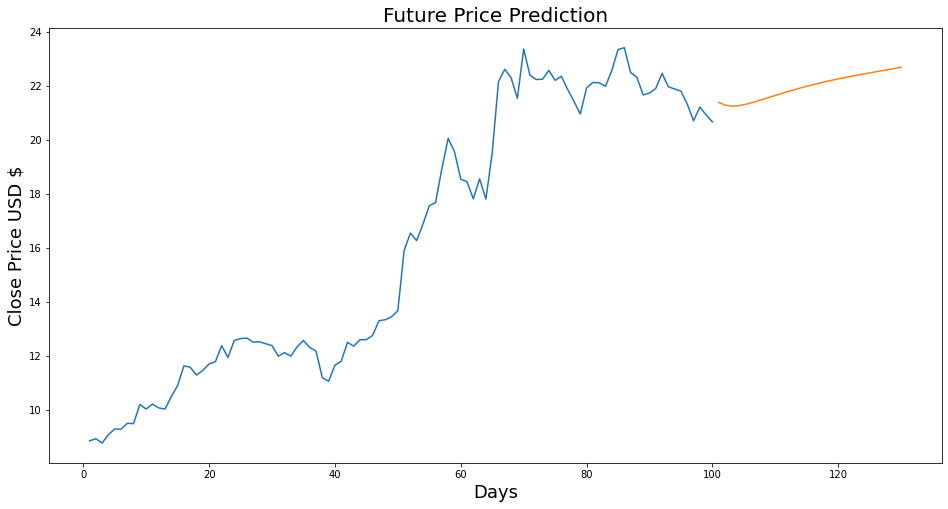

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Future Price Prediction', fontsize=20)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD $',fontsize=18)
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

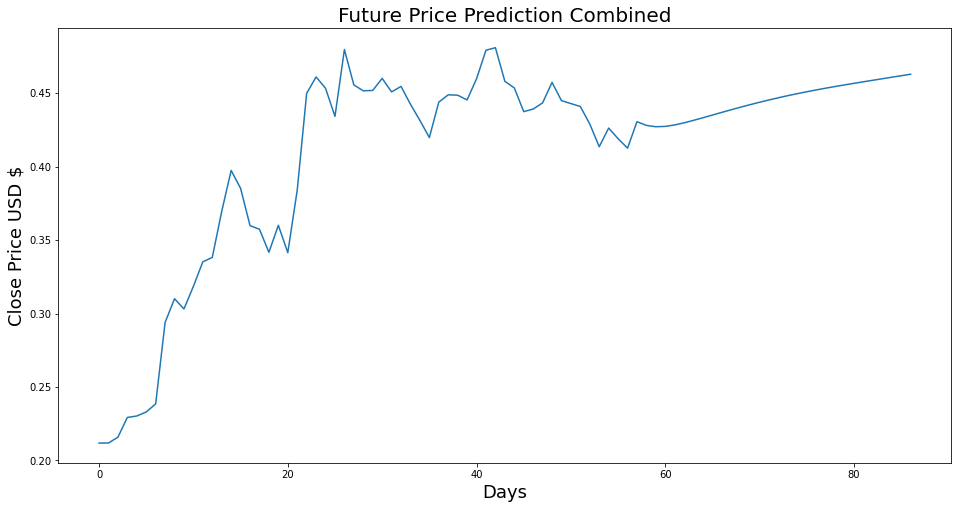

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.figure(figsize=(16,8))
plt.title('Future Price Prediction Combined', fontsize=20)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD $',fontsize=18)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

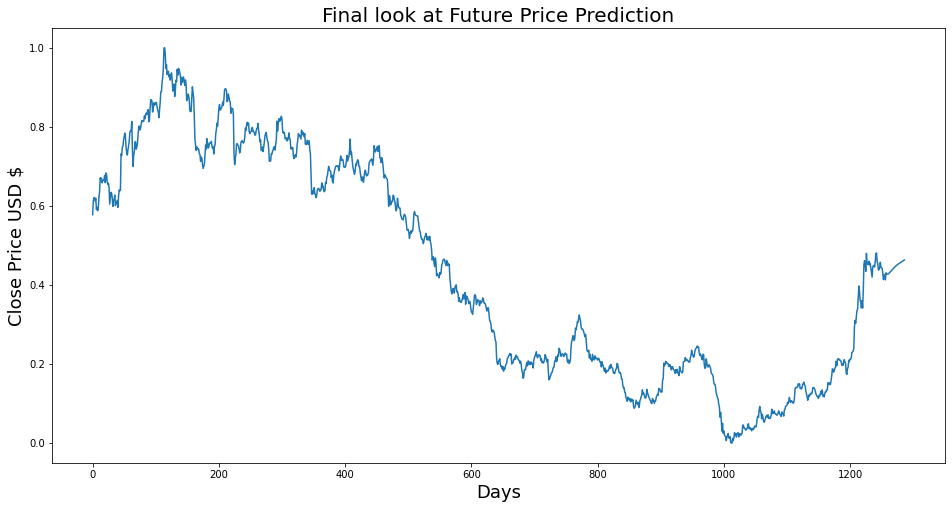

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Final look at Future Price Prediction', fontsize=20)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD $',fontsize=18)
plt.plot(df3)